                                # Assignment 1 (Gaussian Function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from __future__ import division      
import scipy.stats as stats     # for pdfs 
import math

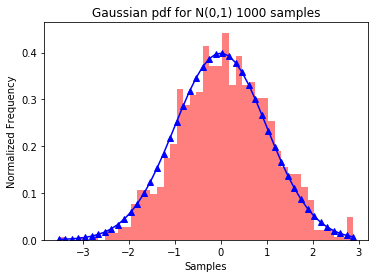

In [2]:
mu , sigma = 0 , 1 #mean and standard deviation
#np.random.seed(4023)
samples = np.random.normal(mu,sigma,1000)
fig = plt.figure()
num_bins = 45
n, bins, patches = plt.hist(samples, num_bins,normed=1, facecolor='red', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'b-^')
plt.xlabel('Samples')
plt.ylabel('Normalized Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.title("Gaussian pdf for N(0,1) 1000 samples")
plt.show()
#plot_url = py.plot_mpl(fig, filename='docs/histogram-mpl-legend')

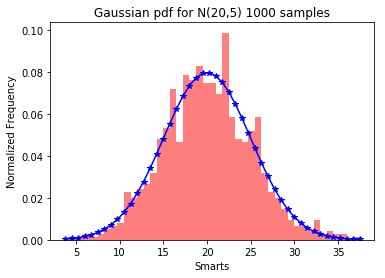

In [3]:
mu , sigma = 20 , 5 #mean and standard deviation
#np.random.seed(4023)
samples = np.random.normal(mu,sigma,1000)
fig = plt.figure()
num_bins = 45
n, bins, patches = plt.hist(samples, num_bins, normed=1, facecolor='red', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'b-*')
plt.xlabel('Smarts')
plt.ylabel('Normalized Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.title("Gaussian pdf for N(20,5) 1000 samples")
plt.show()
#plot_url = py.plot_mpl(fig, filename='docs/histogram-mpl-legend')

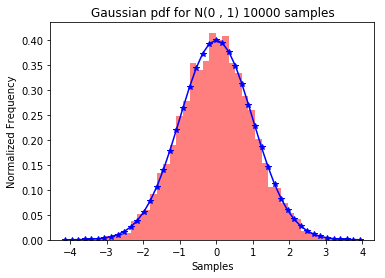

In [4]:
mu , sigma = 0 , 1 #mean and standard deviation
nosamples = 10000
#np.random.seed(4023)
samples = np.random.normal(mu,sigma,nosamples)
fig = plt.figure()
num_bins = 45
n, bins, patches = plt.hist(samples, num_bins,normed=1, facecolor='red', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'b-*')
plt.xlabel('Samples')
plt.ylabel('Normalized Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.title("Gaussian pdf for N(%i , %i) %i samples"%(mu ,sigma,nosamples) )
plt.show()
#plot_url = py.plot_mpl(fig, filename='docs/histogram-mpl-legend')

(10000,)


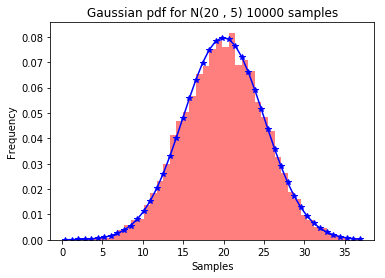

In [5]:
mu , sigma = 20 , 5 #mean and standard deviation
nosamples = 10000
#np.random.seed(4023)
samples = np.random.normal(mu,sigma,nosamples)
print(samples.shape)
fig = plt.figure()
num_bins = 45
n, bins, patches = plt.hist(samples, num_bins,normed=1, facecolor='red', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'b-*')
plt.xlabel('Samples')
plt.ylabel('Frequency')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.title("Gaussian pdf for N(%i , %i) %i samples"%(mu ,sigma,nosamples) )
plt.show()
#plot_url = py.plot_mpl(fig, filename='docs/histogram-mpl-legend')
#print(n)
#print(patches)
#print(bin)

                                        Central Limit Theorem

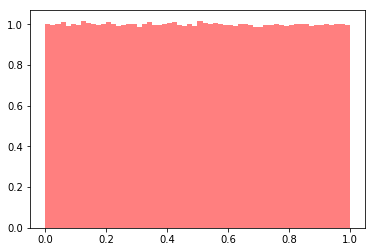

Mean of the population is 0.499550430781
Variance of the population is 0.0833507428486


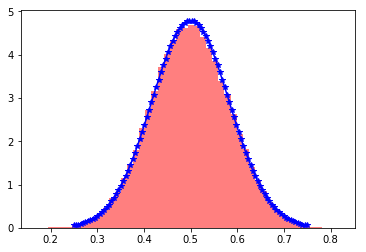

(83333,)


In [8]:
beta = 5 # number of trials, probability of each trial
n = 1000000
exp_sample = np.random.uniform(0,1, n)
plt.hist(exp_sample, 60,normed=1, facecolor='red', alpha=0.5)
plt.show()

no_samples = 12 #Noumber of samples at time
a = np.zeros([int(n/no_samples)])
mea = np.zeros([int(n/no_samples)])
for i in range(int(n/no_samples)):
    for j in range(no_samples):
        a[i] += np.random.choice(exp_sample)
    mea[i] = ( a[i].mean()/no_samples)
#print((mea))
original_mean = exp_sample.mean()
print("Mean of the population is",original_mean)
original_var = exp_sample.var()
original_sigma = original_var**0.5
print("Variance of the population is",original_var)
n1, bins, patches = plt.hist(mea, 50,normed=True,facecolor='red', alpha=0.5)
#print(bins)
mu = original_mean
sigma = math.sqrt(original_var) / (no_samples**0.5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),'b-*')

#y = mlab.normpdf(bins, original_mean, original_var)
#plt.plot(bins, y, 'r-*')
plt.show()
print(mea.shape)

                                    #Bivariate Gaussian Distribution

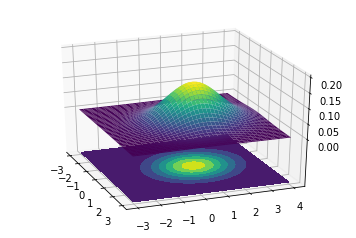

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 120
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.1], [-0.1,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()